In [3]:
import pandas as pd

In [4]:
#sms_data = pd.read_csv('SmsCollection.csv')
#messages = [line.rstrip() for line in open('SmsCollection.csv')]
#messages = [line.replace(";", "\t") for line in messages]


In [5]:
#for message_no, message in enumerate(messages[1:4]):
#    print(message_no,message)
#    print('\n')

In [6]:
messages = pd.read_csv('SmsCollection.csv', sep=';', names=["label", "message"], skiprows=1)
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,label,message
count,5572,5570
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4823   4505                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages = messages.astype(str)

messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt
plt.hist(messages['length'],bins=50) 

(array([2.25e+02, 1.51e+03, 9.93e+02, 6.04e+02, 4.42e+02, 3.03e+02,
        3.17e+02, 3.89e+02, 6.23e+02, 6.60e+01, 2.20e+01, 1.20e+01,
        1.70e+01, 1.00e+01, 1.00e+00, 1.10e+01, 5.00e+00, 3.00e+00,
        3.00e+00, 2.00e+00, 3.00e+00, 1.00e+00, 2.00e+00, 3.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 746.56, 764.72, 782.88, 801.04, 819.2 , 837.36, 85

In [11]:
messages.length.describe()

count    5572.000000
mean       76.935032
std        56.060486
min         2.000000
25%        34.000000
50%        58.000000
75%       116.250000
max       910.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002041A295460>,
      dtype=object)

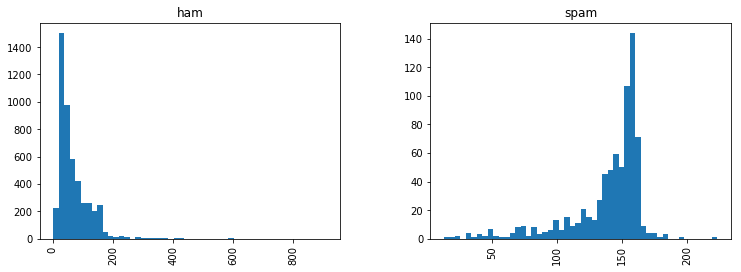

In [12]:
import seaborn as sns
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [13]:
print('Ham:\n',messages[messages['label']=='ham'].length.describe())
print('Spam:\n',messages[messages['label']=='spam'].length.describe())

Ham:
 count    4825.000000
mean       67.382798
std        53.090550
min         2.000000
25%        32.000000
50%        50.000000
75%        87.000000
max       910.000000
Name: length, dtype: float64
Spam:
 count    747.000000
mean     138.634538
std       29.002617
min       13.000000
25%      133.000000
50%      149.000000
75%      157.000000
max      223.000000
Name: length, dtype: float64


Average length of spam message is larger

In [14]:
#!conda install nltk #This installs nltk
import nltk # Imports the library
#nltk.download() #Download the necessary datasets

In [15]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)
from nltk.corpus import stopwords
stopwords.words('english')[0:50] # Show some stop words


Sample message Notice it has punctuation


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be']

In [16]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [17]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [21]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11065


In [22]:
message4 = messages['message'][4]
print(message4)

Nah I don't think he goes to usf, he lives around here though


In [23]:
bow4 = bow_transformer.transform([message4])
print(bow4)

  (0, 2850)	1
  (0, 4621)	1
  (0, 5920)	1
  (0, 6653)	1
  (0, 7582)	1
  (0, 10091)	1
  (0, 10108)	1
  (0, 10452)	1


In [24]:
messages_bow = bow_transformer.transform(messages['message'])

In [25]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11065)
Amount of Non-Zero occurences:  48764


In [26]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_bow, messages['label'])

In [27]:
print('predicted:', spam_detect_model.predict(messages_bow[0])[0])
print('expected:', messages.label[0])

predicted: ham
expected: ham


In [28]:
all_predictions = spam_detect_model.predict(messages_bow)
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       0.98      0.98      0.98       747

    accuracy                           0.99      5572
   macro avg       0.99      0.99      0.99      5572
weighted avg       0.99      0.99      0.99      5572



In [29]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [30]:
msg_train.apply(text_process)

907     [lastest, Stereophonics, Marley, Dizzee, Racal...
1121              [Cancel, cheyyamoand, get, money, back]
2110                               [Lara, said, loan, lt]
2812                      [Thinkin, someone, good, drugs]
2730    [Urgent, Please, call, 09066612661, landline, ...
                              ...                        
3790            [sure, dont, mean, get, made, hold, weed]
1025           [Hasnt, pattern, recently, crap, weekends]
2056                                 [Sir, waiting, mail]
1134    [entered, cabin, PA, said, Happy, Bday, Boss, ...
3507                                               [Nite]
Name: message, Length: 4457, dtype: object

In [31]:
msg_test.apply(text_process)

1336    [Sometimes, put, walls, around, heartsnot, saf...
2972    [Height, Confidence, Aeronautics, professors, ...
724                            [Ya, even, cookies, jelly]
1838                                      [hows, husband]
422     [Someone, contacted, dating, service, entered,...
                              ...                        
514                                  [Nojst, change, tat]
507     [Maybe, westshore, hyde, park, village, place,...
3658                 [Studying, ill, free, next, weekend]
1301    [cocksuckers, makes, feel, better, ipads, wort...
1822    [couldnt, say, dying, man, feel, sad, go, want...
Name: message, Length: 1115, dtype: object

In [32]:
messages_bow_train = bow_transformer.transform(msg_train)
messages_bow_test = bow_transformer.transform(msg_test)

In [33]:
print('Shape of Sparse Matrix: ', messages_bow_train.shape)
print('Shape of Sparse Matrix: ', messages_bow_test.shape)

Shape of Sparse Matrix:  (4457, 11065)
Shape of Sparse Matrix:  (1115, 11065)


In [34]:
spam_detect_model = MultinomialNB().fit(messages_bow_train,label_train)

In [35]:
all_predictions = spam_detect_model.predict(messages_bow_test)

In [36]:
print(classification_report(label_test, all_predictions))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       962
        spam       0.85      0.93      0.89       153

    accuracy                           0.97      1115
   macro avg       0.92      0.95      0.93      1115
weighted avg       0.97      0.97      0.97      1115

